# Load libraries

In [1]:

# General libraries
import numpy as np               
import pandas as pd              
import h2o                       
from h2o.automl import H2OAutoML
from h2o.estimators.infogram import H2OInfogram # For Admissible AI, works for classification only. https://docs.h2o.ai/h2o/latest-stable/h2o-docs/admissible.html
import logging
from matplotlib import pyplot as plt


# Custom libraries
from shared_core_data_processing import * 
from spec_core_data_processing import *
from shared_core_h2o_modelling import * 

from shared_testing_data_processing import * 
from spec_testing_data_processing import *


# Other setup configurations
logger = logging.getLogger()
logger.setLevel(logging.INFO)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


# Test custom libraries

In [2]:

## Test shared function ds_common_pandas_dataframe_split_main
run_unit_test_00_ds_common_pandas_dataframe_split_main()

## Test spec function extract_expiring_minutes
run_unit_test_00_extract_expiring_minutes()


INFO:root:Achieved metrics convergence at seed 1 and iteration 1
INFO:root: 
INFO:root:########################
INFO:root:Start unit tests for function extract_expiring_minutes
INFO:root:########################
INFO:root:End unit tests for function extract_expiring_minutes. Number of errors: 0
INFO:root: 


# Define Processing, Training and Model output parameters

In [3]:

# Processing parameters
local_path_input          = 'USA_cars_datasets.csv'

# Modelling parameters
lst_features_categorical   = ['brand', 'model', 'title_status', 'state', 'country', 'color']
lst_features_numerical     = ['year', 'mileage', 'condition']
str_target_variable_regr   = 'price'
str_target_variable_bin    = 'price_bin'
str_target_variable_multi  = 'price_multi'
int_seed                   = 20                                
str_data_id                = 'data_id'
str_path_df_processed      = 'tutorial_df_processed.parquet'

# Train/test and CV split parameters
dict_metrics              = {'price': ['mean']}
dict_metrics_tolerance    = {'price_mean': 0.01}
int_max_number_iterations = 500
dict_splits               = {'train': 0.75, 'test': 0.25}
dict_splits_cv            = {'1': 0.20, '2': 0.20, '3': 0.20, '4': 0.20, '5': 0.20} # Remark: H2O wants the CV fold column levels to be 1, 2, ...
str_colname_split         = 'flag_split_train_test'
str_colname_split_cv      = 'flag_split_folds'

# H2O Data Preparation parameters
dict_h2o_data_prep = {
                      'dict_h2o_init':         {"nthreads": 1},
                      'str_path_df_processed': str_path_df_processed,
                      'str_colname_split':     str_colname_split,
                      'lst_factor_features':   [str_colname_split_cv, str_target_variable_bin, str_target_variable_multi],
                      'lst_numerical_kpi':     [str_target_variable_regr, str_target_variable_bin, str_target_variable_multi]
                     }


In [4]:

# H2O Modelling regression parameters (training & explore exploring)
dict_h2o_train_automl_regression = {
                                     'max_models':          10 
                                    ,'max_runtime_secs':   600    # 10 Minutes
                                    ,'seed':               int_seed
                                    ,'sort_metric':        'RMSE'
                                    ,'stopping_metric':    'RMSE'
                                    ,'stopping_tolerance': 0.001
                                    ,'exclude_algos':      ['XGBoost'] # Not available on windows
                                    ,'exploitation_ratio': 0.1
    
                                    ,'export_checkpoints_dir': 'model_artifacts/'
                                   }

dict_h2o_explore_automl_regression = {
                                      # Parameters for plotting the Automl info
                                       'lst_plot_features':    ['condition']
                                      ,'int_number_models':    20
                                      ,'int_number_features':  10
                                      ,'str_path_root_output': 'plots/'
                                     }

dict_h2o_automl_regression = {
                               'str_tag_data_experiment':  'data_experiment_0'
                              ,'str_ml_problem_type':      'regression'
                              ,'str_tag_model_experiment': 'model_experiment_0_regression' 
                              ,'str_target_variable':      str_target_variable_regr  
                              ,'str_colname_split_cv':     str_colname_split_cv
                              ,'lst_features':             ['condition', 'title_status', 'mileage', 'color',
                                                            'model', 'state', 'brand', 'country', 'year']
    
                              ,'dict_h2o_train':           dict_h2o_train_automl_regression
                              ,'dict_h2o_explore':         dict_h2o_explore_automl_regression
                             }


In [5]:

# H2O Modelling binary classification parameters (training & explore exploring)
dict_h2o_train_automl_binary = {
                                 'max_models':          10 
                                ,'max_runtime_secs':   600    # 10 Minutes
                                ,'seed':               int_seed
                                ,'sort_metric':        'AUC'
                                ,'stopping_metric':    'AUC'
                                ,'stopping_tolerance': 0.001
                                ,'exclude_algos':      ['XGBoost'] # Not available on windows
                                ,'exploitation_ratio': 0.1
    
                                ,'export_checkpoints_dir': 'model_artifacts/'
                               }

dict_h2o_explore_automl_binary = {
                                  # Parameters for plotting the Automl info
                                   'lst_plot_features':    ['condition']
                                  ,'int_number_models':    20
                                  ,'int_number_features':  10
                                  ,'str_path_root_output': 'plots/'
                                 }

dict_h2o_automl_binary = {
                           'str_tag_data_experiment':  'data_experiment_0'
                          ,'str_ml_problem_type':      'binary_classification'
                          ,'str_tag_model_experiment': 'model_experiment_0_binary_classification' 
                          ,'str_target_variable':      str_target_variable_bin 
                          ,'str_colname_split_cv':     str_colname_split_cv
                          ,'lst_features':             ['condition', 'title_status', 'mileage', 'color',
                                                        'model', 'state', 'brand', 'country', 'year']
    
                          ,'dict_h2o_train':           dict_h2o_train_automl_binary
                          ,'dict_h2o_explore':         dict_h2o_explore_automl_binary
                         }


In [6]:

# H2O Modelling multiclassification parameters (training & explore exploring)
dict_h2o_train_automl_multi = {
                                 'max_models':          10 
                                ,'max_runtime_secs':   600    # 10 Minutes
                                ,'seed':               int_seed
                                ,'sort_metric':        'logloss'
                                ,'stopping_metric':    'logloss'
                                ,'stopping_tolerance': 0.001
                                ,'exclude_algos':      ['XGBoost'] # Not available on windows
                                ,'exploitation_ratio': 0.1
                        
                                ,'export_checkpoints_dir': 'model_artifacts/'
                               }

dict_h2o_explore_automl_multi = {
                                  # Parameters for plotting the Automl info
                                   'lst_plot_features':    ['condition']
                                  ,'int_number_models':    20
                                  ,'int_number_features':  10
                                  ,'str_path_root_output': 'plots/'
                                 }

dict_h2o_automl_multi = {
                           'str_tag_data_experiment':  'data_experiment_0'
                          ,'str_ml_problem_type':      'multinomial_classification'
                          ,'str_tag_model_experiment': 'model_experiment_0_multinomial_classification' 
                          ,'str_target_variable':      str_target_variable_multi
                          ,'str_colname_split_cv':     str_colname_split_cv
                          ,'lst_features':             ['condition', 'title_status', 'mileage', 'color',
                                                        'model', 'state', 'brand', 'country', 'year']
    
                          ,'dict_h2o_train':           dict_h2o_train_automl_multi
                          ,'dict_h2o_explore':         dict_h2o_explore_automl_multi
                         }


In [7]:

#dict_h2o_automl = dict_h2o_automl_regression
#dict_h2o_automl = dict_h2o_automl_binary
dict_h2o_automl = dict_h2o_automl_multi


# Main processing

In [8]:

### Data processing
## Load data
df = pd.read_csv(local_path_input)

## Extract expiring minutes
df['condition'] = df['condition'].map(lambda x: extract_expiring_minutes(x))

## Add binomial and multinomial target variables
df[str_target_variable_bin]   = df['price'].map(lambda x: 1 if x > 18000 else 0)
df[str_target_variable_multi] = df['price'].map(lambda x: map_target_variable_multi(x))

## Create data id column
df[str_data_id] = df.index


### Data split
## Add train/test and CV split columns
# Train/test split column
list_input_columns       = [key for key in dict_metrics.keys()] + [str_data_id]
df_split_col             = ds_common_pandas_dataframe_split_main(df[list_input_columns].copy(), str_colname_split , dict_splits, dict_metrics, dict_metrics_tolerance, int_seed, int_max_number_iterations)
df                       = pd.merge(left = df, right = df_split_col[[str_data_id , str_colname_split]], how = "left", on = 'data_id')

# CV split column (remark: it must be done on training set only)
list_input_columns       = [key for key in dict_metrics.keys()] + [str_data_id]
df_split_col_cv          = ds_common_pandas_dataframe_split_main(df[df[str_colname_split]=='train'][list_input_columns].copy(), str_colname_split_cv , dict_splits_cv, dict_metrics, dict_metrics_tolerance, int_seed, int_max_number_iterations)
df                       = pd.merge(left = df, right = df_split_col_cv[[str_data_id , str_colname_split_cv]], how = "left", on = 'data_id')
df[str_colname_split_cv] = df[str_colname_split_cv].map(lambda x: 'missing' if pd.isnull(x) else x)


### Handle schema (optional, TODO)


### Save processed file
df.to_parquet(str_path_df_processed, compression = 'gzip', index = False)


## Remove constant features from list of explanatory features
lst_features = ds_common_get_list_model_features_main(df, lst_features_numerical + lst_features_categorical)

del df


INFO:root:Achieved metrics convergence at seed 26 and iteration 7
INFO:root:Warning: metrics did not converge, last iteration metrics are {'price_mean': [0.06943444754200545, 0.01]}
INFO:root:Using the last iteration split
INFO:root:Df has the following constant features: []


# H2O Data preparation

In [9]:

## Process train and test sets
df_h2o_train, df_h2o_test, df_h2o_validation = ds_common_h2o_data_preparation_main(**dict_h2o_data_prep)


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.191-b12, mixed mode)
  Starting server from C:\Users\david\anaconda3\envs\test\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\david\AppData\Local\Temp\tmp948vlm0i
  JVM stdout: C:\Users\david\AppData\Local\Temp\tmp948vlm0i\h2o_david_started_from_python.out
  JVM stderr: C:\Users\david\AppData\Local\Temp\tmp948vlm0i\h2o_david_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_david_7h65mx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.762 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,1
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


INFO:root:Train vs test vs valid H2O frame number of records: 1853 vs 646 vs 0
INFO:root:Train vs test vs valid price mean: 18769.669185105253 vs 18761.941176470602 vs nan
INFO:root:Train vs test vs valid price variance: 149831594.49363422 vs 138321938.14227074 vs 0.0
INFO:root:Train vs test vs valid price_bin mean: 0.4635725849973017 vs 0.4628482972136223 vs nan
INFO:root:Train vs test vs valid price_bin variance: 0.24880731613786064 vs 0.24900520795833636 vs 0.0
INFO:root:Train vs test vs valid price_multi mean: 1.1225040474905568 vs 1.1099071207430344 vs nan
INFO:root:Train vs test vs valid price_multi variance: 0.5881164045462439 vs 0.6065063479492164 vs 0.0


# H2O Modeling - Regression target variable

In [10]:

## Fit H2O Automl on train set
aml = H2OAutoML(**dict_h2o_automl['dict_h2o_train'])

aml.train(x              = dict_h2o_automl['lst_features'],
          y              = dict_h2o_automl['str_target_variable'], 
          training_frame = df_h2o_train, 
          fold_column    = dict_h2o_automl['str_colname_split_cv'])


AutoML progress: |
13:20:36.173: Fold column flag_split_folds will be used for cross-validation. nfolds parameter will be ignored.
13:20:36.173: Stopping tolerance set by the user is < 70% of the recommended default of 0.02323069967623409, so models may take a long time to converge or may not converge at all.


13:20:36.723: GLM_1_AutoML_1_20220427_132036 [GLM def_1] failed: java.lang.ArrayIndexOutOfBoundsException: 220

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220427_132036

No model summary for this model

ModelMetricsMultinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.033386652227264745
RMSE: 0.18272014729433847

ModelMetricsMultinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.14655774159987994
RMSE: 0.38282860603653945

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.803981,0.029001,0.761905,0.832402,0.823848,0.787234,0.814516
1,auc,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,err,0.196019,0.029001,0.238095,0.167598,0.176152,0.212766,0.185484
3,err_count,72.800000,12.111978,90.000000,60.000000,65.000000,80.000000,69.000000
4,logloss,0.440167,0.031441,0.486871,0.428491,0.450103,0.433920,0.401452
5,max_per_class_error,0.232294,0.044022,0.288462,0.173611,0.224359,0.260274,0.214765
6,mean_per_class_accuracy,0.807060,0.033476,0.757878,0.831594,0.835000,0.787031,0.823794
7,mean_per_class_error,0.192940,0.033476,0.242122,0.168406,0.165000,0.212969,0.176206
8,mse,0.146543,0.012228,0.166684,0.139234,0.145305,0.146677,0.134817
9,null_deviance,799.199800,25.846128,828.418200,762.970800,786.215450,817.484100,800.910600


## Plot core Automl explainability analysis

In [11]:

dict_h2o_explore_automl = dict_h2o_automl['dict_h2o_explore']


In [12]:

# Get tabular Automl Extra information
df_output_info  = ds_common_h2o_process_automl_main(aml, 
                                                    df_h2o_train, df_h2o_test, df_h2o_validation, 
                                                    dict_h2o_automl['str_tag_data_experiment'], 
                                                    dict_h2o_automl['str_tag_model_experiment'], 
                                                    dict_h2o_automl['str_ml_problem_type'])
df_output_info.head()


INFO:root:H2O Frame has no rows for label valid, hence skipping everything
INFO:root:H2O Frame has no rows for label valid, hence skipping everything
INFO:root:H2O Frame has no rows for label valid, hence skipping everything
INFO:root:H2O Frame has no rows for label valid, hence skipping everything
INFO:root:H2O Frame has no rows for label valid, hence skipping everything
INFO:root:H2O Frame has no rows for label valid, hence skipping everything
INFO:root:H2O Frame has no rows for label valid, hence skipping everything
INFO:root:H2O Frame has no rows for label valid, hence skipping everything
INFO:root:H2O Frame has no rows for label valid, hence skipping everything
INFO:root:H2O Frame has no rows for label valid, hence skipping everything
INFO:root:H2O Frame has no rows for label valid, hence skipping everything
INFO:root:H2O Frame has no rows for label valid, hence skipping everything


,tag_data_experiment,tag_model_experiment,model_id,algo,logloss_lb,training_time_ms,predict_time_per_row_ms,mean_cv_logloss,sd_cv_logloss,cv_1_valid_logloss,cv_2_valid_logloss,cv_3_valid_logloss,cv_4_valid_logloss,cv_5_valid_logloss,min_cv_value_logloss,max_cv_value_logloss,logloss_train,logloss_test,col_sample_rate,col_sample_rate_per_tree,max_depth,min_rows,min_split_improvement,ntrees,sample_rate,str_feature_importance,number_variables,number_features,epochs,epsilon,hidden,hidden_dropout_ratios,input_dropout_ratio,rho
0,data_experiment_0,model_experiment_0_multinomial_classification,StackedEnsemble_AllModels_1_AutoML_1_20220427_132036,StackedEnsemble,0.442165,18530,0.432116,0.440167,0.031441,0.486871,0.428491,0.450103,0.43392,0.401452,0.401452,0.486871,0.129956,0.464737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,data_experiment_0,model_experiment_0_multinomial_classification,StackedEnsemble_BestOfFamily_1_AutoML_1_20220427_132036,StackedEnsemble,0.445606,15218,0.186682,0.444056,0.033723,0.490561,0.430423,0.458828,0.440815,0.399654,0.399654,0.490561,0.156193,0.473037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,data_experiment_0,model_experiment_0_multinomial_classification,GBM_5_AutoML_1_20220427_132036,GBM,0.469159,387,0.060878,0.478344,0.035506,0.536147,0.453258,0.483378,0.472391,0.446543,0.446543,0.536147,0.132214,0.461010,0.8,0.8,6.0,1.0,0.00001,45.0,0.8,"model_0.4893, state_0.1605, mileage_0.1328, brand_0.0646, color_0....",9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
3,data_experiment_0,model_experiment_0_multinomial_classification,GBM_4_AutoML_1_20220427_132036,GBM,0.472300,587,0.075595,0.494265,0.034451,0.551356,0.459663,0.489129,0.493131,0.478046,0.459663,0.551356,0.106542,0.475981,0.8,0.8,10.0,10.0,0.00001,42.0,0.8,"model_0.5466, state_0.1448, mileage_0.1031, color_0.0582, year_0.0...",8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
4,data_experiment_0,model_experiment_0_multinomial_classification,GBM_2_AutoML_1_20220427_132036,GBM,0.473453,422,0.068610,0.487548,0.037718,0.54831,0.460654,0.478189,0.496355,0.454232,0.454232,0.54831,0.138430,0.477762,0.8,0.8,7.0,10.0,0.00001,46.0,0.8,"model_0.478, state_0.1728, mileage_0.1588, brand_0.0633, color_0.0...",8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN


INFO:root:Fold train and column condition error on partial dependence plot, skipping it
INFO:root:Fold test and column condition error on partial dependence plot, skipping it
INFO:root:Fold valid has no rows - skipping all plots


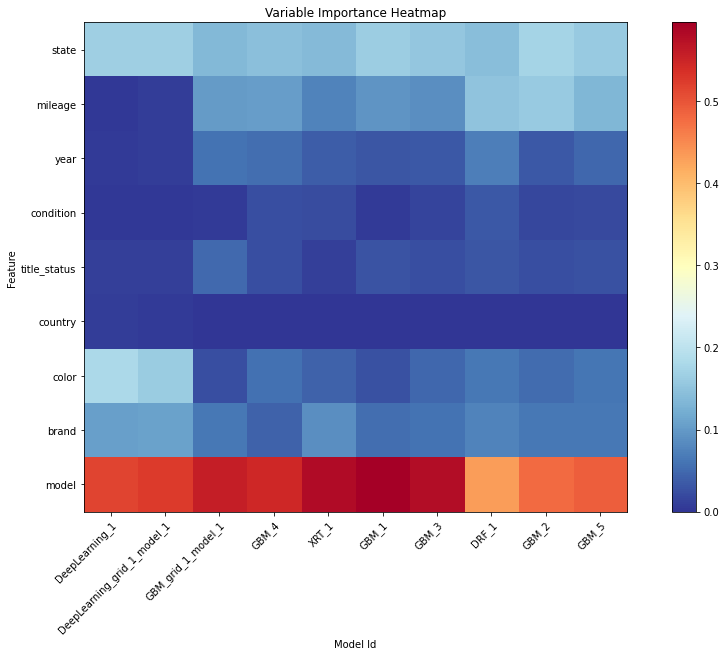

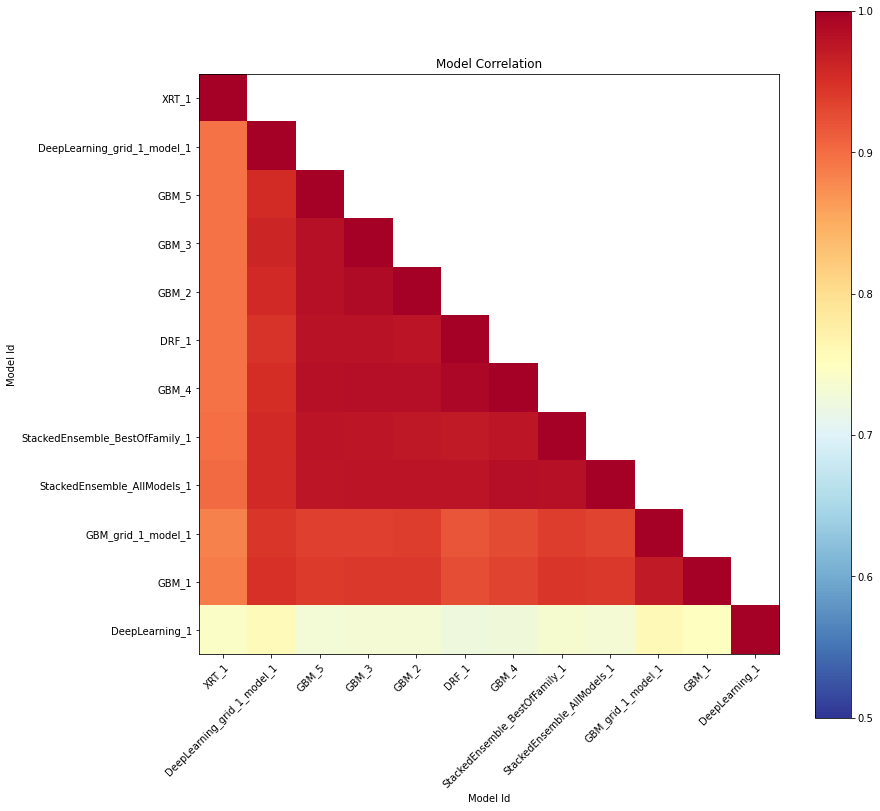

<Figure size 1152x648 with 0 Axes>

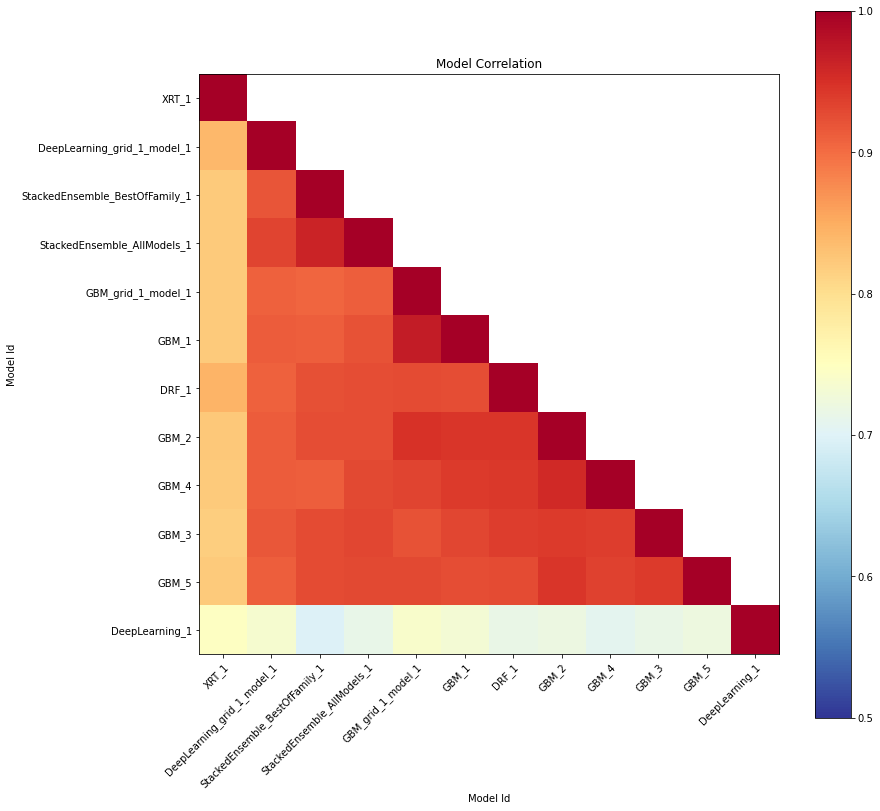

<Figure size 1152x648 with 0 Axes>

In [13]:

# Plot core Automl Explainability analysis
ds_common_h2o_plot_automl_explaination_main(aml.leaderboard.head(dict_h2o_explore_automl['int_number_models']), 
                                            df_h2o_train, df_h2o_test, df_h2o_validation,
                                            dict_h2o_explore_automl['str_path_root_output'], 
                                            dict_h2o_explore_automl['lst_plot_features'], 
                                            dict_h2o_explore_automl['int_number_features'],
                                            dict_h2o_automl['str_tag_data_experiment'],
                                            dict_h2o_automl['str_tag_model_experiment'])


# ### The next analises are generally run in a separate job after training, where only 1 model is studied

### Automl output analysis - Correlation between hyperparameters and data folds for selected metrics and model families

## Single model analysis - Explainability

# Single model analysis - Emblem plots